### Khai báo thư viện

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


In [7]:
url = "./dulieu.csv"
sales_data = pd.read_csv(url)
sales_data_original = sales_data

### Thông tin loại biến

In [8]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Khu vuc           100000 non-null  object 
 1   Quoc gia          100000 non-null  object 
 2   Loai san pham     100000 non-null  object 
 3   Kenh ban hang     100000 non-null  object 
 4   Uu tien dat hang  100000 non-null  object 
 5   Ngay dat          100000 non-null  object 
 6   ID dat hang       100000 non-null  int64  
 7   Ngay van chuyen   100000 non-null  object 
 8   Doanh so          100000 non-null  int64  
 9   Don gia           100000 non-null  float64
 10  Gia nhap          100000 non-null  float64
 11  Tong doanh thu    100000 non-null  float64
 12  Tong Chi phi      100000 non-null  float64
 13  Loi nhuan         100000 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 10.7+ MB


### Xem các biến

In [9]:
sales_data.head(10)

,Khu vuc,Quoc gia,Loai san pham,Kenh ban hang,Uu tien dat hang,Ngay dat,ID dat hang,Ngay van chuyen,Doanh so,Don gia,Gia nhap,Tong doanh thu,Tong Chi phi,Loi nhuan
0,Middle East and North Africa,Azerbaijan,Snacks,Online,C,10/8/2014,535113847,10/23/2014,934,152.58,97.44,142509.72,91008.96,51500.76
1,Central America and the Caribbean,Panama,Cosmetics,Offline,L,2/22/2015,874708545,2/27/2015,4551,437.20,263.33,1989697.20,1198414.83,791282.37
2,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Offline,M,12/9/2015,854349935,1/18/2016,9986,9.33,6.92,93169.38,69103.12,24066.26
3,Sub-Saharan Africa,Sao Tome and Principe,Personal Care,Online,M,9/17/2014,892836844,10/12/2014,9118,81.73,56.67,745214.14,516717.06,228497.08
4,Central America and the Caribbean,Belize,Household,Offline,H,2/4/2010,129280602,3/5/2010,5858,668.27,502.54,3914725.66,2943879.32,970846.34
5,Europe,Denmark,Clothes,Online,C,2/20/2013,473105037,2/28/2013,1149,109.28,35.84,125562.72,41180.16,84382.56
6,Europe,Germany,Cosmetics,Offline,M,3/31/2013,754046475,5/3/2013,7964,437.20,263.33,3481860.80,2097160.12,1384700.68
7,Middle East and North Africa,Turkey,Fruits,Online,C,3/26/2012,772153747,4/7/2012,6307,9.33,6.92,58844.31,43644.44,15199.87
8,Europe,United Kingdom,Snacks,Online,H,12/29/2012,847788178,1/15/2013,8217,152.58,97.44,1253749.86,800664.48,453085.38
9,Asia,Kazakhstan,Cosmetics,Online,H,9/11/2015,471623599,9/18/2015,2758,437.20,263.33,1205797.60,726264.14,479533.46


### Xem dữ liệu rỗng


In [11]:
number_of_nulls_by_column = sales_data.isnull().sum().sort_values(ascending=False)
percent_of_nulls = sales_data.isnull().sum()/sales_data.isnull().count()*100
percent_rounded = (round(percent_of_nulls, 1)).sort_values(ascending=False)
missing_data = pd.concat([number_of_nulls_by_column, percent_rounded], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Loi nhuan,0,0.0
Tong Chi phi,0,0.0
Tong doanh thu,0,0.0
Gia nhap,0,0.0
Don gia,0,0.0
Doanh so,0,0.0
Ngay van chuyen,0,0.0
ID dat hang,0,0.0
Ngay dat,0,0.0
Uu tien dat hang,0,0.0


### Tương quan của các biến

In [12]:
sns.set(style="whitegrid", color_codes=True)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot('Tong doanh thu',data=sales_data,hue = 'Tong Chi phi')

sns.despine(offset=10, trim=True)


/home/nguyennhuy/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret input 'Tong chi phi'

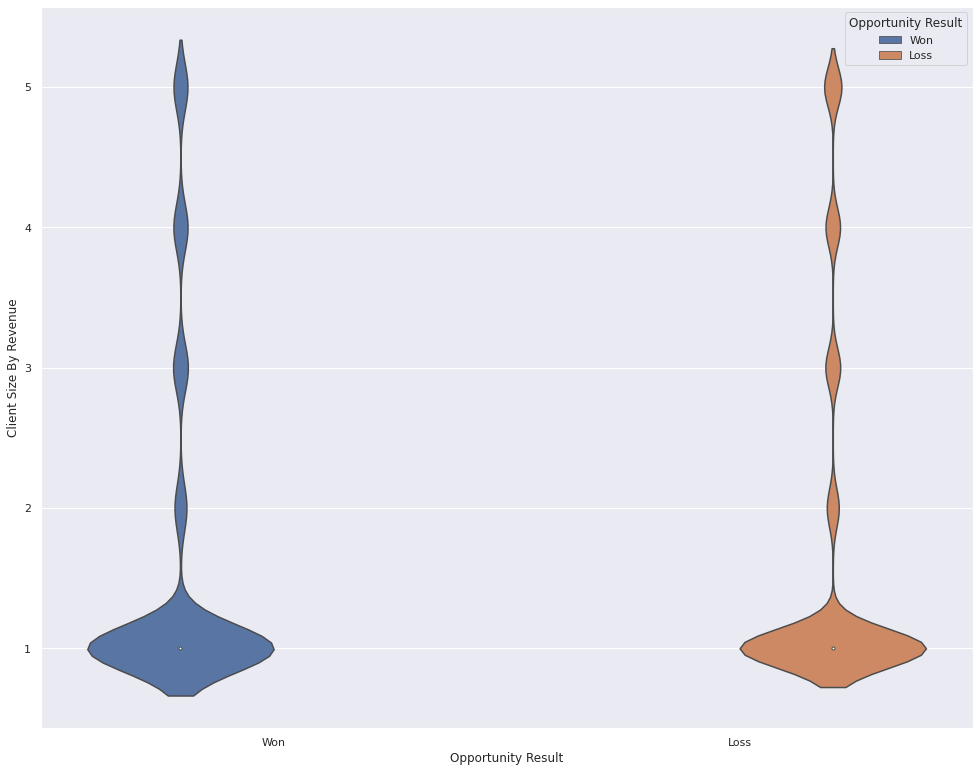

In [25]:
sns.set(rc={'figure.figsize':(16.7,13.27)})
sns.violinplot(x="Opportunity Result",y="Client Size By Revenue", hue="Opportunity Result", data=sales_data);
plt.show()



**Mối quan hệ giữa số lượng nhân viên làm việc trong một chiến dịch và liệu chiến dịch đó có đối thủ cạnh tranh (được biết hay không), cho thấy sự mất mát hay được lợi, được thể hiện theo khu vực.**

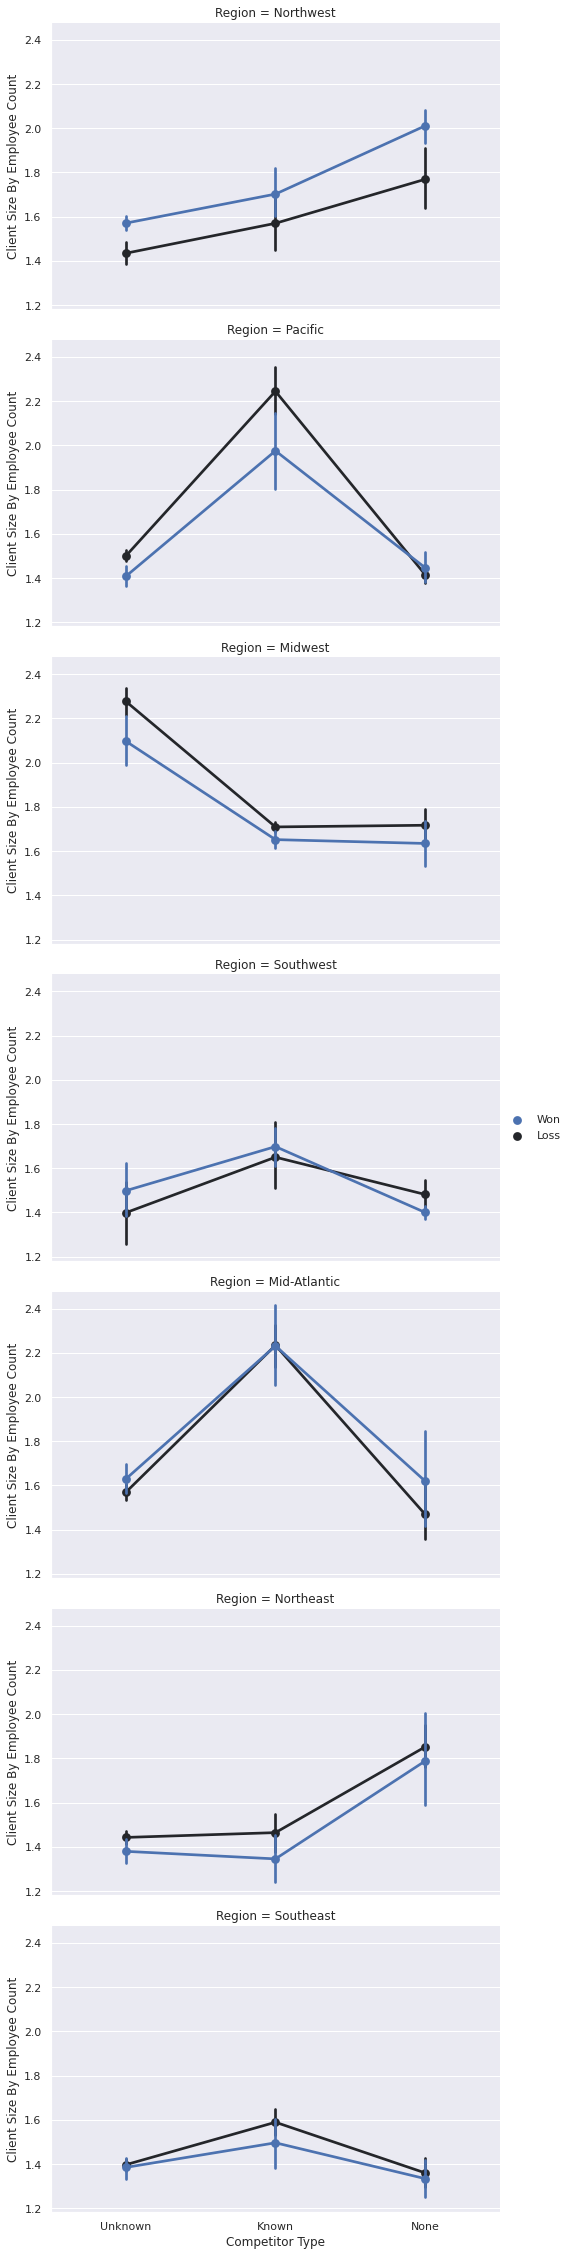

In [26]:
FacetGrid = sns.FacetGrid(sales_data_original, row= 'Region', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Competitor Type', 'Client Size By Employee Count', 'Opportunity Result', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

### Tỷ lệ giữa số cơ hội thành công và thất bại theo khu vực, được sắp xếp theo số đô la chi tiêu

/home/nguyennhuy/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Region 6')

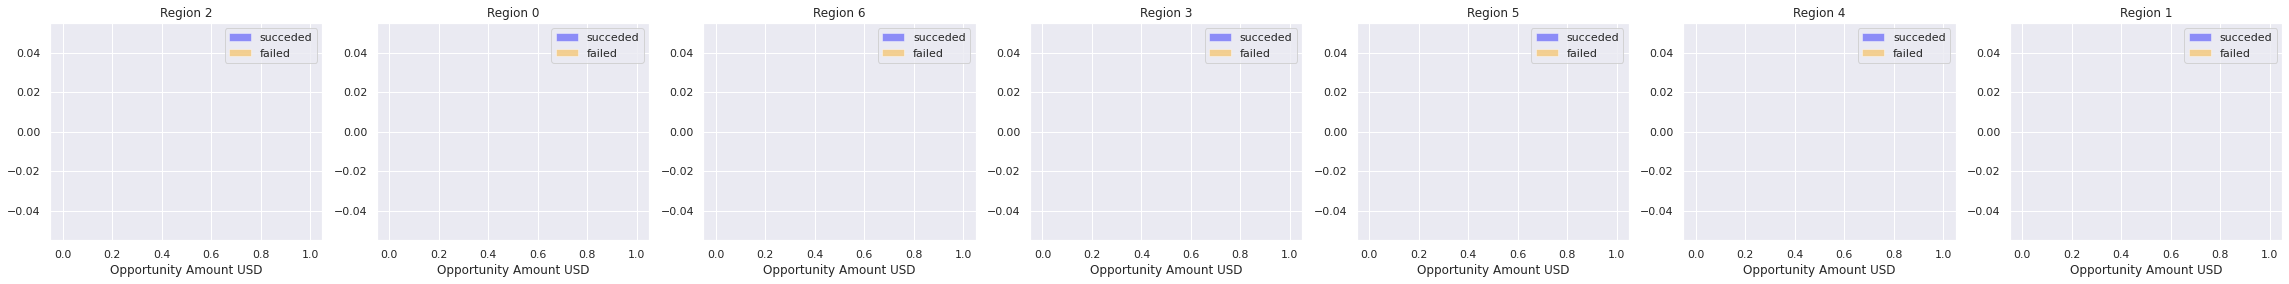

In [27]:
survived = 'succeded'
not_survived = 'failed'


fig, axes = plt.subplots(nrows=1, ncols=7,figsize=(40, 4))
reg0 = sales_data[sales_data['Region'] == 0]
reg1 = sales_data[sales_data['Region'] == 1]
reg2 = sales_data[sales_data['Region'] == 2]
reg3 = sales_data[sales_data['Region'] == 3]
reg4 = sales_data[sales_data['Region'] == 4]
reg5 = sales_data[sales_data['Region'] == 5]
reg6 = sales_data[sales_data['Region'] == 6]


reg0[reg0['Opportunity Result'] == 1]['Opportunity Amount USD']
ax = sns.distplot(reg0[reg0['Opportunity Result'] == 1]['Opportunity Amount USD'],color="blue",  label = survived, ax = axes[1], kde =False)
ax = sns.distplot(reg0[reg0['Opportunity Result'] == 0]['Opportunity Amount USD'],color="orange",  label = not_survived, ax = axes[1], kde =False)
ax.legend()
ax.set_title('Region 0')


reg1[reg1['Opportunity Result'] == 1]['Opportunity Amount USD']
ax = sns.distplot(reg1[reg1['Opportunity Result'] == 1]['Opportunity Amount USD'],color="blue",  label = survived, ax = axes[6], kde =False)
ax = sns.distplot(reg1[reg1['Opportunity Result'] == 0]['Opportunity Amount USD'],color="orange",  label = not_survived, ax = axes[6], kde =False)
ax.legend()
ax.set_title('Region 1')


reg2[reg2['Opportunity Result'] == 1]['Opportunity Amount USD']
ax = sns.distplot(reg2[reg2['Opportunity Result'] == 1]['Opportunity Amount USD'],color="blue",  label = survived, ax = axes[0], kde =False)
ax = sns.distplot(reg2[reg2['Opportunity Result'] == 0]['Opportunity Amount USD'],color="orange",  label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Region 2')


reg3[reg3['Opportunity Result'] == 1]['Opportunity Amount USD']
ax = sns.distplot(reg3[reg3['Opportunity Result'] == 1]['Opportunity Amount USD'],color="blue",  label = survived, ax = axes[3], kde =False)
ax = sns.distplot(reg3[reg3['Opportunity Result'] == 0]['Opportunity Amount USD'],color="orange",  label = not_survived, ax = axes[3], kde =False)
ax.legend()
ax.set_title('Region 3')


reg4[reg4['Opportunity Result'] == 1]['Opportunity Amount USD']
ax = sns.distplot(reg4[reg4['Opportunity Result'] == 1]['Opportunity Amount USD'],color="blue",  label = survived, ax = axes[5], kde =False)
ax = sns.distplot(reg4[reg4['Opportunity Result'] == 0]['Opportunity Amount USD'],color="orange",  label = not_survived, ax = axes[5], kde =False)
ax.legend()
ax.set_title('Region 4')


reg5[reg5['Opportunity Result'] == 1]['Opportunity Amount USD']
ax = sns.distplot(reg5[reg5['Opportunity Result'] == 1]['Opportunity Amount USD'],color="blue",  label = survived, ax = axes[4], kde =False)
ax = sns.distplot(reg5[reg5['Opportunity Result'] == 0]['Opportunity Amount USD'],color="orange",  label = not_survived, ax = axes[4], kde =False)
ax.legend()
ax.set_title('Region 5')


reg6[reg6['Opportunity Result'] == 1]['Opportunity Amount USD']
ax = sns.distplot(reg6[reg6['Opportunity Result'] == 1]['Opportunity Amount USD'],color="blue",  label = survived, ax = axes[2], kde =False)
ax = sns.distplot(reg6[reg6['Opportunity Result'] == 0]['Opportunity Amount USD'],color="orange",  label = not_survived, ax = axes[2], kde =False)
ax.legend()
ax.set_title('Region 6')


### Chuyển đổi các biến phân loại thành số

In [28]:
le = LabelEncoder()

sales_data['Supplies Subgroup'] = le.fit_transform(sales_data['Supplies Subgroup'])
sales_data['Region'] = le.fit_transform(sales_data['Region'])
sales_data['Route To Market'] = le.fit_transform(sales_data['Route To Market'])
sales_data['Opportunity Result'] = le.fit_transform(sales_data['Opportunity Result'])
sales_data['Competitor Type'] = le.fit_transform(sales_data['Competitor Type'])
sales_data['Supplies Group'] = le.fit_transform(sales_data['Supplies Group'])

sales_data.head()

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,2,0,3,0,76,1,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,1658010,2,0,4,2,63,0,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1
2,1674737,5,2,4,2,24,1,7,82,82,7750,1,1,0,2,1.00000,0.000000,0.000000,1
3,1675224,8,2,1,2,16,0,5,124,124,0,1,1,0,0,1.00000,0.000000,0.000000,1
4,1689785,2,0,4,2,69,0,11,91,13,69756,1,1,0,2,0.00000,0.141125,0.000000,4


In [29]:
numeric_features = sales_data.select_dtypes(include=[np.number])
numeric_features.dtypes

Opportunity Number                           int64
Supplies Subgroup                            int64
Supplies Group                               int64
Region                                       int64
Route To Market                              int64
Elapsed Days In Sales Stage                  int64
Opportunity Result                           int64
Sales Stage Change Count                     int64
Total Days Identified Through Closing        int64
Total Days Identified Through Qualified      int64
Opportunity Amount USD                       int64
Client Size By Revenue                       int64
Client Size By Employee Count                int64
Revenue From Client Past Two Years           int64
Competitor Type                              int64
Ratio Days Identified To Total Days        float64
Ratio Days Validated To Total Days         float64
Ratio Days Qualified To Total Days         float64
Deal Size Category                           int64
dtype: object

In [30]:
corr = numeric_features.corr()

print (corr['Opportunity Result'].sort_values(ascending=False)[:10], '\n')
print (corr['Opportunity Result'].sort_values(ascending=False)[-10:])

Opportunity Result                    1.000000
Revenue From Client Past Two Years    0.277688
Ratio Days Qualified To Total Days    0.208131
Sales Stage Change Count              0.092017
Route To Market                       0.081942
Opportunity Number                    0.042167
Competitor Type                      -0.003661
Elapsed Days In Sales Stage          -0.016561
Client Size By Revenue               -0.017341
Client Size By Employee Count        -0.019456
Name: Opportunity Result, dtype: float64 

Client Size By Employee Count             -0.019456
Supplies Group                            -0.026049
Region                                    -0.030763
Supplies Subgroup                         -0.035639
Opportunity Amount USD                    -0.075764
Ratio Days Validated To Total Days        -0.172233
Deal Size Category                        -0.192270
Ratio Days Identified To Total Days       -0.201432
Total Days Identified Through Closing     -0.262864
Total Days Identifi

### Ma trận tương quan

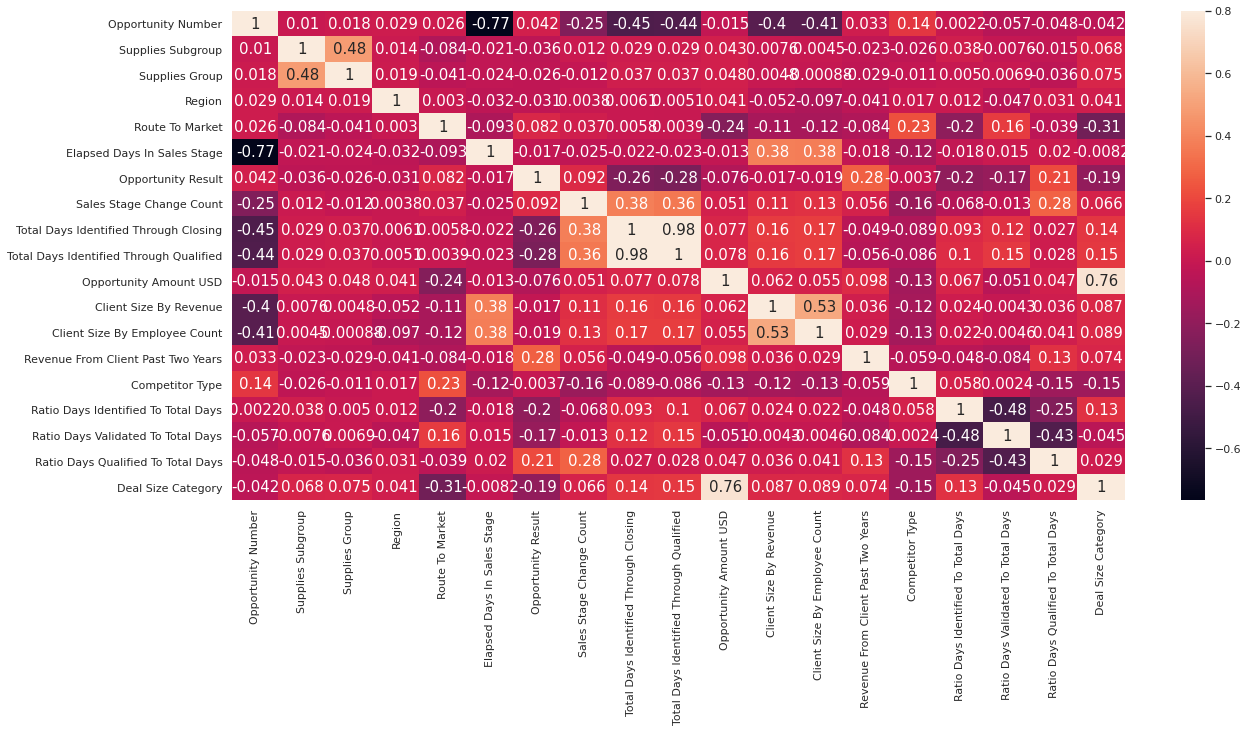

In [31]:
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 15}, annot=True);


### Training và bộ kiểm tra

In [32]:
cols = [col for col in sales_data.columns if col not in ['Opportunity Number','Opportunity Result']]

data = sales_data[cols]
target = sales_data['Opportunity Result']

data.head(2)

,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,2,0,3,0,76,13,104,101,0,5,5,0,2,0.69636,0.113985,0.154215,1
1,2,0,4,2,63,2,163,163,0,3,5,0,2,0.00000,1.000000,0.000000,1


### Tách tập dữ liệu thành đào tạo và kiểm tra

In [33]:
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)


### Xây dựng mô hình - Naive Bayes

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#create an object of the type GaussianNB
start = time.time()
gnb = GaussianNB()

pred = gnb.fit(data_train, target_train).predict(data_test)

acc_gaussian = round(accuracy_score(target_test, pred, normalize = True)*100, 2)
end = time.time()

print("Độ chính xác Naive-Bayes : ",acc_gaussian, "%")
print("Thời gian chạy: ", end - start, "giây")

Độ chính xác Naive-Bayes :  75.91 %
Thời gian chạy:  0.0946357250213623 giây


### Xây dựng mô hình - Random Forest

In [35]:
#A floresta là một tập hợp các cây quyết định hầu hết thời gian được huấn luyện theo phương pháp "đóng túi". Ý tưởng chung của phương pháp này là sự kết hợp của các mô hình học tập sẽ làm tăng kết quả chung.
start = time.time()
random_forest = RandomForestClassifier()
pred = random_forest.fit(data_train, target_train).predict(data_test)

#in điểm chính xác của mô hìnhogistic Random Forest
acc_random_forest = round(accuracy_score(target_test, pred, normalize = True)*100, 2)
end = time.time()

print("Độ chính xác Random Forest :", acc_random_forest, "%")
print("Thời gian chạy:", end - start, "giây")

Độ chính xác Random Forest : 87.82 %
Thời gian chạy: 15.730091094970703 giây


### Xây dựng mô hình - Logistic Regression

In [36]:
#Kỹ thuật này nhằm mục đích tạo ra, từ các quan sát, một mô hình cho phép dự đoán các giá trị được lấy bởi một biến phân loại (Thường là nhị phân). 
start = time.time()
logreg = LogisticRegression()

#in điểm chính xác của mô hìnhogistic Logistic Regression
pred = logreg.fit(data_train, target_train).predict(data_tesochat)
acc_log = round(accuracy_score(target_test, pred, normalize = True)*100, 2)
end = time.time()

print("Độ chính xác Logistic Regression :", acc_log, "%")
print("Thời gian chạy:", end - start, "giây")

NameError: name 'data_tesochat' is not defined

### Xây dựng mô hình - Stochastic Gradient

In [20]:
# Implementa uma rotina de aprendizado de descida de gradiente estocástica simples que suporta diferentes funções de perda e penalidades para classificação.
start = time.time()
sgd = linear_model.SGDClassifier(tol=None)
sgd.fit(data_train, target_train)
Y_pred = sgd.predict(data_test)

sgd.score(data_train, target_train)

acc_sgd = round(sgd.score(data_train, target_train) * 100, 2)
end = time.time()

print (" Độ chính xác Stochastic Gradient Decent: ",acc_sgd, "%")
print("Thời gian chạy:", end - start, "segundos")

 Độ chính xác Stochastic Gradient Decent:  77.89 %
Thời gian chạy: 14.837825775146484 segundos


### Xây dựng mô hình - Support Vector Machines


In [21]:
start = time.time()
linear_svc = LinearSVC()
linear_svc.fit(data_train, target_train)

Y_pred = linear_svc.predict(data_test)

acc_linear_svc = round(linear_svc.score(data_train, target_train) * 100, 2)
end = time.time()

print ("Hỗ trợ Máy Vector: ",acc_linear_svc, "%")
print("Thời gian chạy:", end - start, "giây")

Hỗ trợ Máy Vector:  67.14 %
Thời gian chạy: 28.138431787490845 giây
/home/nguyennhuy/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


### Xây dựng mô hình - KNN


In [22]:
start = time.time()

knn = KNeighborsClassifier()
knn.fit(data_train, target_train)
Y_pred = knn.predict(data_test)

acc_knn = round(knn.score(data_train, target_train) * 100, 2)
end = time.time()

print ("KNN: ",acc_knn, "%")
print("Thời gian chạy:", end - start, "giây")

KNN:  86.58 %
Thời gian chạy: 11.313081502914429 giây


### Xây dựng mô hình - Perceptron


In [23]:
start = time.time()
perceptron = Perceptron(max_iter=2000)
perceptron.fit(data_train, target_train)

Y_pred = perceptron.predict(data_test)

acc_perceptron = round(perceptron.score(data_train, target_train) * 100, 2)
end = time.time()

print ("Perceptron: ",acc_perceptron, "%")
print("Thời gian chạy:", end - start, "giây")

Perceptron:  75.43 %
Thời gian chạy: 0.33693623542785645 giây


### Xây dựng mô hình - Decision Tree


In [24]:
start = time.time()
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(data_train, target_train)  
Y_pred = decision_tree.predict(data_test)  

acc_decision_tree = round(decision_tree.score(data_train, target_train) * 100, 2)
end = time.time()

print ("Decision Tree: ",acc_decision_tree, "%")
print("Thời gian chạy:", end - start, "giây")

Decision Tree:  99.97 %
Thời gian chạy: 0.8346078395843506 giây


### kết quả

In [25]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
87.76,Random Forest
86.58,KNN
77.89,Stochastic Gradient Decent
77.18,Logistic Regression
75.91,Naive Bayes
75.43,Perceptron
67.14,Support Vector Machines


In [26]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier()
scores = cross_val_score(rf, data_train, target_train, cv=10, scoring = "accuracy")
results = pd.DataFrame({"Điểm:":scores, 
                        "Ý nghĩa:":scores.mean(), 
                        "Độ lệch chuẩn:":scores.std()})


In [27]:
importances = pd.DataFrame({'feature':data_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
Opportunity Amount USD,0.124
Elapsed Days In Sales Stage,0.120
Revenue From Client Past Two Years,0.106
Total Days Identified Through Qualified,0.103
Total Days Identified Through Closing,0.091
Sales Stage Change Count,0.073
Ratio Days Qualified To Total Days,0.068
Ratio Days Validated To Total Days,0.052
Region,0.046


<AxesSubplot:xlabel='feature'>

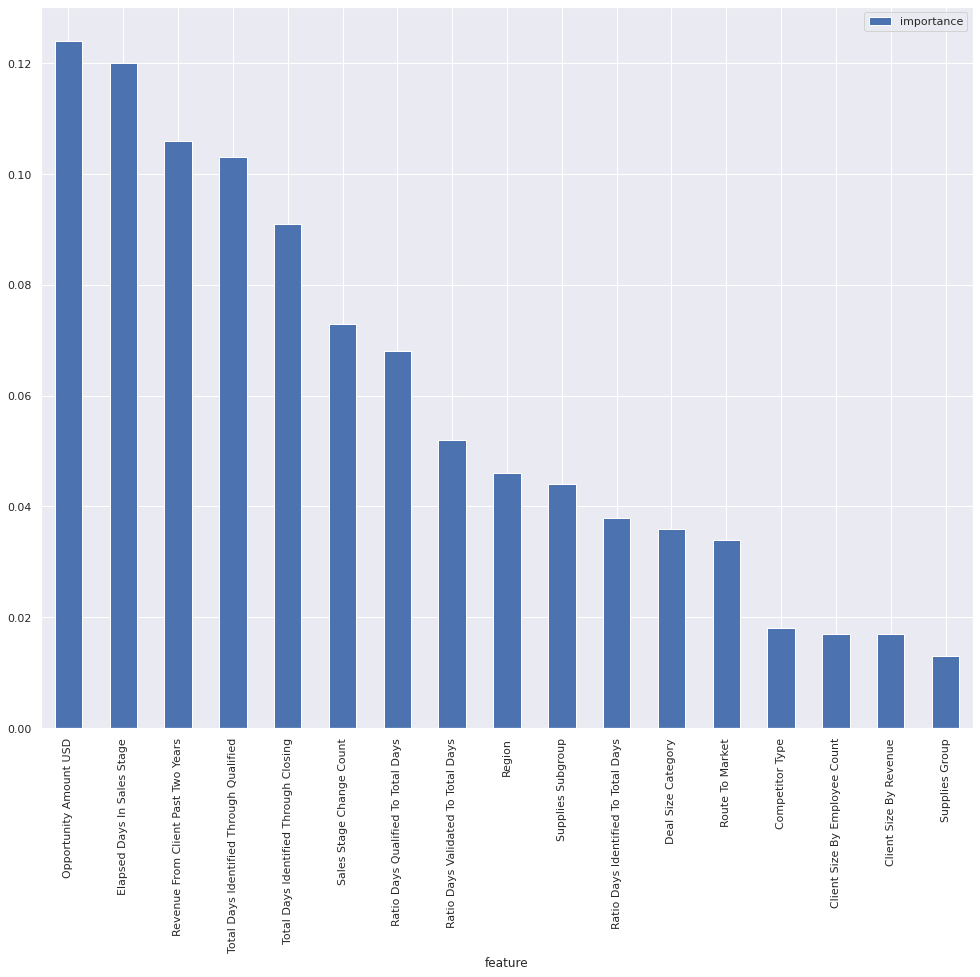

In [28]:
importances.plot.bar()

In [29]:
train_df  = data_train.drop("Client Size By Employee Count", axis=1)
test_df  = data_test.drop("Client Size By Employee Count", axis=1)

train_df  = train_df.drop("Competitor Type", axis=1)
test_df  = test_df.drop("Competitor Type", axis=1)

In [30]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100, oob_score = True)
random_forest.fit(data_train, target_train)
Y_prediction = random_forest.predict(data_train)

random_forest.score(data_train, target_train)

acc_random_forest = round(random_forest.score(data_train, target_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

99.97 %


In [31]:
print("OOB SCORE:", round(random_forest.oob_score_, 4)*100, "%")


OOB SCORE: 87.99 %


In [32]:
# param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10, 25, 50, 70], "min_samples_split" : [2, 4, 10, 12, 16, 18, 25, 35], "n_estimators": [100, 400, 700, 1000, 1500]}
# from sklearn.model_selection import GridSearchCV, cross_val_score
# rf = RandomForestClassifier(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
# clf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)
# clf.fit(data_train, target_train)
# clf.bestparams

In [33]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(data_train, target_train)
Y_prediction = random_forest.predict(data_test)

random_forest.score(data_train, target_train)

print("OOB SCORE:", round(random_forest.oob_score_, 4)*100, "%")

OOB SCORE: 88.11 %


In [34]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(random_forest, data_train, target_train, cv=3)
confusion_matrix(target_train, predictions)

array([[40024,  2308],
       [ 4324,  7961]])

In [35]:
from sklearn.metrics import precision_score, recall_score

print("Độ chính xác: %.3f" % precision_score(target_train, predictions))
print("Recall: %.3f" % recall_score(target_train, predictions))

Độ chính xác: 0.775
Gọi lại: 0.648


In [36]:
from sklearn.metrics import f1_score
print ("%.3f" % f1_score(target_train, predictions))

0.706


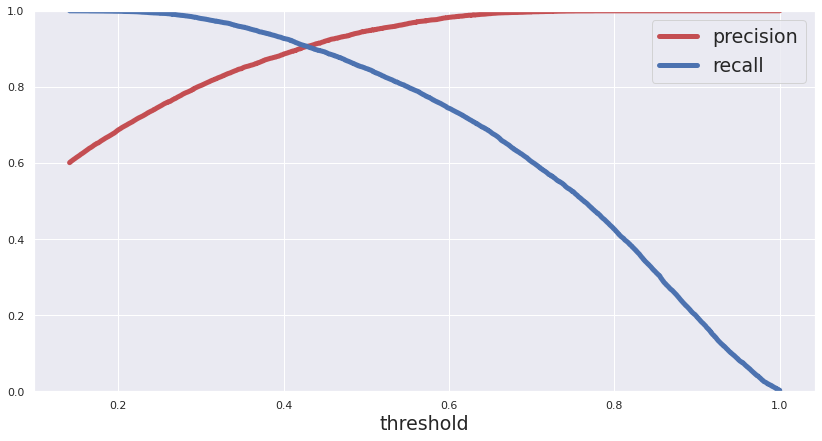

In [37]:
from sklearn.metrics import precision_recall_curve

# nhận được xác suất của các dự đoán
y_scores = random_forest.predict_proba(data_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(target_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="độ chính xác", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("ngưỡng", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

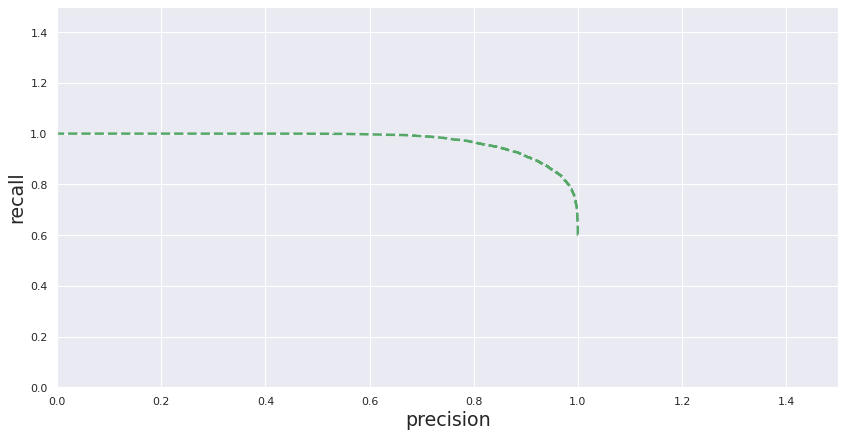

In [38]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("độ chính xác", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()

In [38]:
from sklearn.metrics import roc_curve
# tính toán tỷ lệ tích cực và tỷ lệ tiêu cực
false_positive_rate, true_positive_rate, thresholds = roc_curve(target_train, y_scores)
# Biểu đồ phân tích
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('Tỉ lệ tiêu cực (FPR)', fontsize=16)
    plt.ylabel('Tỉ lệ tích cực (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

NameError: name 'y_scores' is not defined

In [37]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(target_train, y_scores)
print("ROC_AUC_SCORE:", r_a_score)

NameError: name 'y_scores' is not defined

In [ ]:
from yellowbrick.classifier import ClassificationReport
# Khởi tạo mô hình phân loại và trình hiển thị
visualizer = ClassificationReport(random_forest, classes=['Won','Loss'])
visualizer.fit(data_train, target_train) # Điều chỉnh dữ liệu đào tạo với trình hiển thị
visualizer.score(data_test, target_test) # Đánh giá mô hình trên dữ liệu thử nghiệm
g = visualizer.poof() # Vẽ hiển thị